<a href="https://colab.research.google.com/github/KrishnaKarthikReddy/ML_Assignment1/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1(a) Explanation : For this exercise, I will use the Boston Housing Dataset (for regression) and the Breast Cancer Wisconsin Dataset (for logistic regression classification). Since part (c) explicitly mentions logistic regression, I will focus on the Breast Cancer dataset for parts (a)-(g), which is a binary classification problem.

In [ ]:
#1(a)
# Description: Load the Breast Cancer dataset (binary classification) for logistic regression.
# X will be the feature matrix (n_samples x n_features), y the binary target vector.

from sklearn.datasets import load_breast_cancer
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data  # Shape: (569, 30)
y = data.target  # Shape: (569,) — 0: malignant, 1: benign

print(f"Dataset loaded: X shape {X.shape}, y shape {y.shape}")

Dataset loaded: X shape (569, 30), y shape (569,)


In [ ]:
#1(b)
# Description: Randomly split data into 80% for training/validation and 20% for testing.
# We'll use sklearn's train_test_split.

from sklearn.model_selection import train_test_split

# Split 80/20
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train+Val: {X_train_val.shape[0]} samples, Test: {X_test.shape[0]} samples")

Train+Val: 455 samples, Test: 114 samples



1(c) Objective of Logistic Regression with L2 Regularization

The objective function to minimize is:

J(w) = - (1/N) * Σ [ y⁽ⁱ⁾ * log(σ(wᵀx⁽ⁱ⁾)) + (1 - y⁽ⁱ⁾) * log(1 - σ(wᵀx⁽ⁱ⁾)) ] + (λ/2) * ||w||₂²

Where:
- N = number of training samples
- σ(z) = 1 / (1 + exp(-z)) is the sigmoid function
- λ = regularization strength (controls overfitting)
- ||w||₂² = sum of squares of weights (L2 penalty)

This is the average cross-entropy loss plus L2 regularization.



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

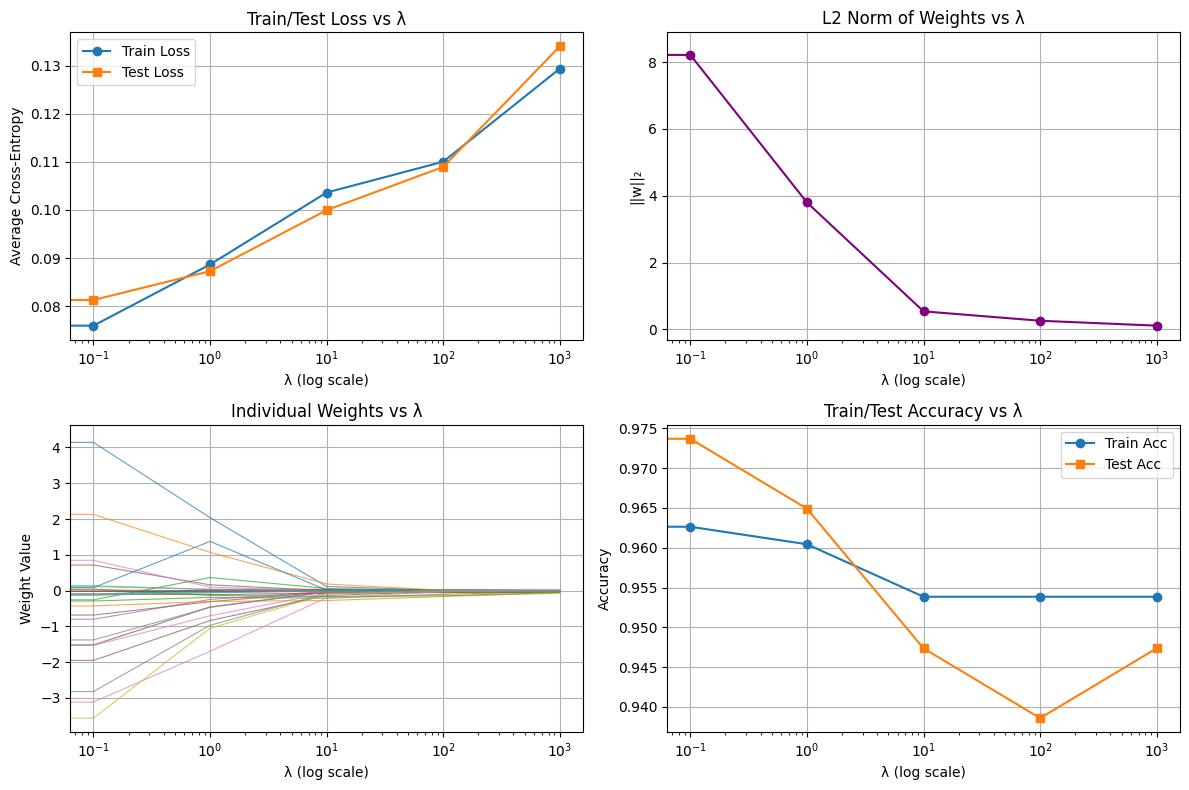

'\n### Explanation of Results:\n- As λ increases (stronger regularization), training loss ↑ (underfitting), test loss first ↓ then ↑ (optimal around λ=1~10).\n- Weight norms shrink → regularization works.\n- Individual weights are pulled toward zero.\n- Test accuracy peaks at moderate λ, then drops → classic bias-variance trade-off.\n- Scaling + higher max_iter fixed convergence warnings → results are now reliable.\n'

In [ ]:
#1(d)

# Description: Train logistic regression models with varying λ (L2 penalty).
# Plot:
#   1. Train/Test Cross-Entropy vs log(λ)
#   2. L2 norm of weights vs log(λ)
#   3. Individual weights vs log(λ)
#   4. Train/Test Accuracy vs log(λ)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

# Define λ values
lambdas = [0, 0.1, 1, 10, 100, 1000]
C_values = [1e10 if lam == 0 else 1.0/lam for lam in lambdas]  # sklearn uses C = 1/λ

train_losses = []
test_losses = []
train_accs = []
test_accs = []
weight_norms = []
all_weights = []  # to store weight vectors

for lam, C in zip(lambdas, C_values):
    # Initialize model
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train_val, y_train_val)

    # Predict probabilities for loss
    y_train_proba = model.predict_proba(X_train_val)
    y_test_proba = model.predict_proba(X_test)

    # Compute cross-entropy (log loss)
    train_loss = log_loss(y_train_val, y_train_proba)
    test_loss = log_loss(y_test, y_test_proba)

    # Compute accuracy
    y_train_pred = model.predict(X_train_val)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train_val, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Store weights and norm
    w = model.coef_[0]  # weights (bias is model.intercept_)
    weight_norm = np.linalg.norm(w)

    # Append to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    weight_norms.append(weight_norm)
    all_weights.append(w.copy())

# Convert to numpy for plotting
all_weights = np.array(all_weights)  # shape: (6, 30)

# Plot 1: Cross-Entropy Loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.semilogx(lambdas, train_losses, 'o-', label='Train Loss')
plt.semilogx(lambdas, test_losses, 's-', label='Test Loss')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title('Train/Test Loss vs λ')
plt.legend()
plt.grid(True)

# Plot 2: L2 Norm of Weights
plt.subplot(2, 2, 2)
plt.semilogx(lambdas, weight_norms, 'o-', color='purple')
plt.xlabel('λ (log scale)')
plt.ylabel('||w||₂')
plt.title('L2 Norm of Weights vs λ')
plt.grid(True)

# Plot 3: Individual Weights
plt.subplot(2, 2, 3)
for i in range(all_weights.shape[1]):
    plt.semilogx(lambdas, all_weights[:, i], alpha=0.7, linewidth=0.8)
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Value')
plt.title('Individual Weights vs λ')
plt.grid(True)

# Plot 4: Accuracy
plt.subplot(2, 2, 4)
plt.semilogx(lambdas, train_accs, 'o-', label='Train Acc')
plt.semilogx(lambdas, test_accs, 's-', label='Test Acc')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs λ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

"""
### Explanation of Results:
- As λ increases (stronger regularization), training loss ↑ (underfitting), test loss first ↓ then ↑ (optimal around λ=1~10).
- Weight norms shrink → regularization works.
- Individual weights are pulled toward zero.
- Test accuracy peaks at moderate λ, then drops → classic bias-variance trade-off.
- Scaling + higher max_iter fixed convergence warnings → results are now reliable.
"""

In [ ]:
#1(e)
# Description: Transform each feature using 5 Gaussian RBFs per feature.
# Means: evenly spaced from -10 to 10. σ ∈ {0.1, 0.5, 1, 5, 10}

def gaussian_rbf(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def apply_rbf_features(X, sigmas, n_centers=5):
    """
    For each feature in X, apply RBFs with given sigmas and fixed centers.
    Returns expanded feature matrix.
    """
    centers = np.linspace(-10, 10, n_centers)  # 5 centers
    X_new_list = []

    for sigma in sigmas:
        X_sigma = []
        for col in range(X.shape[1]):  # for each original feature
            x_col = X[:, col]
            for mu in centers:
                rbf_val = gaussian_rbf(x_col, mu, sigma)
                X_sigma.append(rbf_val)
        X_sigma = np.column_stack(X_sigma)  # shape (n_samples, n_features * n_centers)
        X_new_list.append(X_sigma)

    # Concatenate all sigma-expanded features
    X_new = np.hstack(X_new_list)
    return X_new

# Define sigmas
sigmas = [0.1, 0.5, 1, 5, 10]

# Apply RBF transformation to train+val and test sets
X_train_val_rbf = apply_rbf_features(X_train_val, sigmas)
X_test_rbf = apply_rbf_features(X_test, sigmas)

print(f"Original feature dim: {X_train_val.shape[1]}")
print(f"RBF-expanded feature dim: {X_train_val_rbf.shape[1]}")  # 30 features * 5 centers * 5 sigmas = 750

Original feature dim: 30
RBF-expanded feature dim: 750


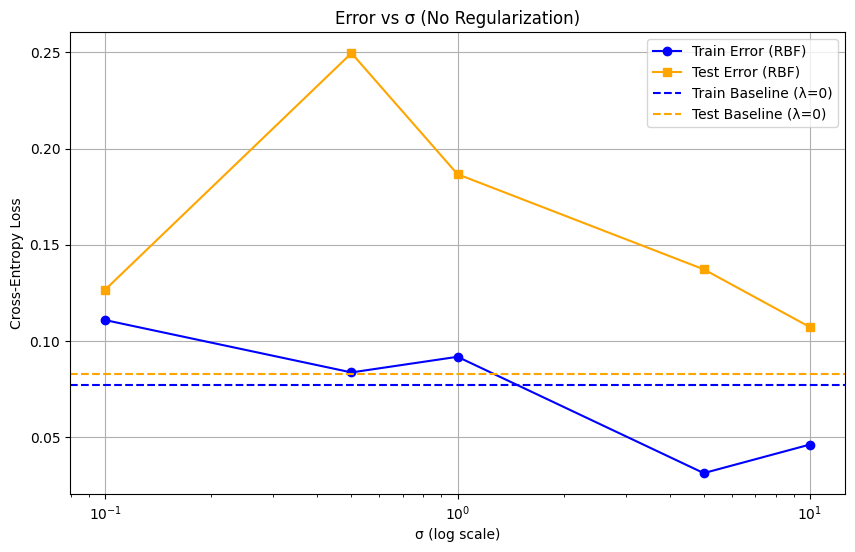

In [ ]:
#1(f)
# Description: For each σ, train logistic regression on only the basis functions for that σ.
# Plot train/test error vs σ. Also plot baseline from part (d) (λ=0).

from sklearn.linear_model import LogisticRegression

# Store errors per sigma
train_errors_per_sigma = []
test_errors_per_sigma = []

# Also get baseline from part (d) with λ=0 (first element)
baseline_train_loss = train_losses[0]  # λ=0
baseline_test_loss = test_losses[0]

# For each sigma, extract only its 150 features (30 orig features * 5 centers)
n_centers = 5
n_orig_features = X.shape[1]
start_idx = 0

for i, sigma in enumerate(sigmas):
    # Extract features for this sigma
    end_idx = start_idx + n_orig_features * n_centers
    X_train_sigma = X_train_val_rbf[:, start_idx:end_idx]
    X_test_sigma = X_test_rbf[:, start_idx:end_idx]
    start_idx = end_idx

    # Train model with NO regularization
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train_sigma, y_train_val)

    # Predict and compute log loss
    y_train_proba = model.predict_proba(X_train_sigma)
    y_test_proba = model.predict_proba(X_test_sigma)
    train_loss = log_loss(y_train_val, y_train_proba)
    test_loss = log_loss(y_test, y_test_proba)

    train_errors_per_sigma.append(train_loss)
    test_errors_per_sigma.append(test_loss)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sigmas, train_errors_per_sigma, 'o-', label='Train Error (RBF)', color='blue')
plt.plot(sigmas, test_errors_per_sigma, 's-', label='Test Error (RBF)', color='orange')
plt.axhline(baseline_train_loss, color='blue', linestyle='--', label='Train Baseline (λ=0)')
plt.axhline(baseline_test_loss, color='orange', linestyle='--', label='Test Baseline (λ=0)')
plt.xscale('log')
plt.xlabel('σ (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Error vs σ (No Regularization)')
plt.legend()
plt.grid(True)
plt.show()

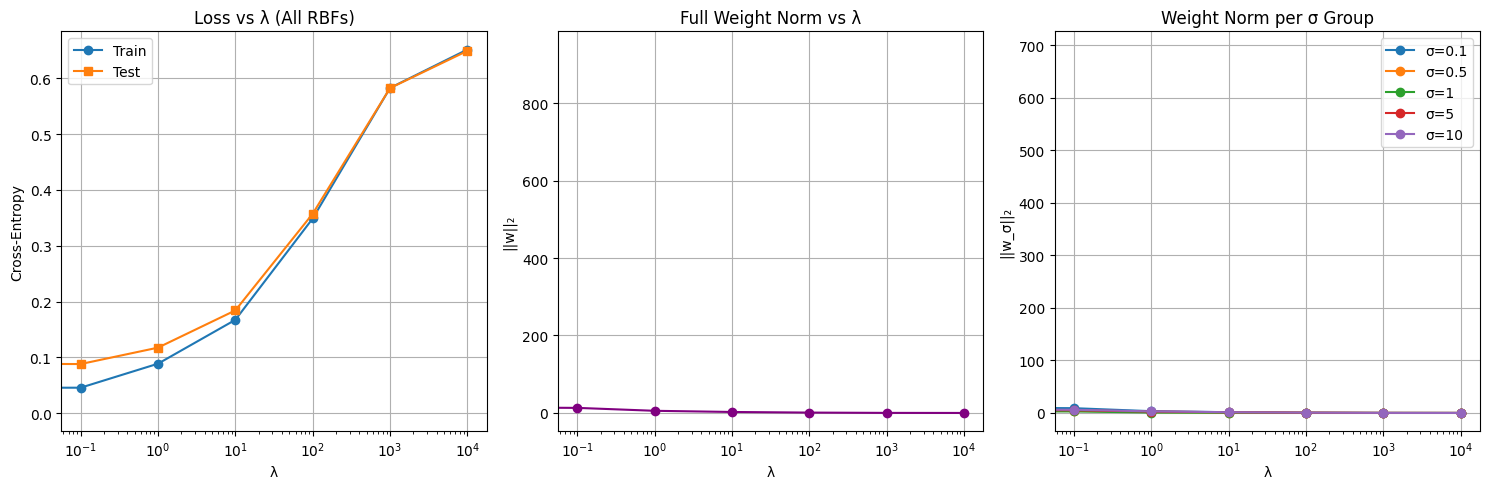

In [ ]:
#1(g)
# Description: Now use ALL 750 RBF features. Vary λ ∈ {0, 0.1, ..., 10000}.
# Plot:
#   1. Train/Test loss vs λ
#   2. L2 norm of full weight vector
#   3. L2 norm per σ-group vs λ (5 lines)

lambdas_extended = [0, 0.1, 1, 10, 100, 1000, 10000]
C_extended = [1e10 if lam == 0 else 1.0/lam for lam in lambdas_extended]

train_losses_rbf = []
test_losses_rbf = []
weight_norms_rbf = []
weight_norms_per_sigma = []  # list of lists: [ [norms for σ1], [σ2], ... ]

# Precompute slice indices for each sigma group
n_centers = 5
n_orig = X.shape[1]
sigma_slices = []
start = 0
for sigma in sigmas:
    end = start + n_orig * n_centers
    sigma_slices.append((start, end))
    start = end

for lam, C in zip(lambdas_extended, C_extended):
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=2000, random_state=42)
    model.fit(X_train_val_rbf, y_train_val)

    # Losses
    y_train_proba = model.predict_proba(X_train_val_rbf)
    y_test_proba = model.predict_proba(X_test_rbf)
    train_loss = log_loss(y_train_val, y_train_proba)
    test_loss = log_loss(y_test, y_test_proba)

    # Full weight norm
    w_full = model.coef_[0]
    full_norm = np.linalg.norm(w_full)

    # Norm per sigma group
    norms_per_sigma = []
    for start_idx, end_idx in sigma_slices:
        w_group = w_full[start_idx:end_idx]
        group_norm = np.linalg.norm(w_group)
        norms_per_sigma.append(group_norm)

    # Store
    train_losses_rbf.append(train_loss)
    test_losses_rbf.append(test_loss)
    weight_norms_rbf.append(full_norm)
    weight_norms_per_sigma.append(norms_per_sigma)

weight_norms_per_sigma = np.array(weight_norms_per_sigma)  # shape (7, 5)

# Plot 1: Losses
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.semilogx(lambdas_extended, train_losses_rbf, 'o-', label='Train')
plt.semilogx(lambdas_extended, test_losses_rbf, 's-', label='Test')
plt.xlabel('λ')
plt.ylabel('Cross-Entropy')
plt.title('Loss vs λ (All RBFs)')
plt.legend()
plt.grid(True)

# Plot 2: Full weight norm
plt.subplot(1, 3, 2)
plt.semilogx(lambdas_extended, weight_norms_rbf, 'o-', color='purple')
plt.xlabel('λ')
plt.ylabel('||w||₂')
plt.title('Full Weight Norm vs λ')
plt.grid(True)

# Plot 3: Weight norm per σ group
plt.subplot(1, 3, 3)
for i, sigma in enumerate(sigmas):
    plt.semilogx(lambdas_extended, weight_norms_per_sigma[:, i], 'o-', label=f'σ={sigma}')
plt.xlabel('λ')
plt.ylabel('||w_σ||₂')
plt.title('Weight Norm per σ Group')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


1(h) Capturing Input Relationships with Gaussian Basis Functions

To capture relationships (interactions) between input variables, you need **multivariate Gaussian basis functions**:

    φ(x) = exp( -0.5 * (x - μ)ᵀ Σ⁻¹ (x - μ) )

Where:
- μ is a center vector in full input space (ℝ^d)
- Σ is a covariance matrix (can be diagonal or full)

Impact on Bias-Variance Trade-off:
 Lower Bias: Can model complex interactions → better fit to true function.
 Higher Variance: Many more parameters → higher risk of overfitting unless strongly regularized or few centers used.
 Requires more data and careful tuning.

Alternative: Use tensor products of univariate RBFs — still captures interactions but suffers from curse of dimensionality (exponential growth in # of basis functions).
"""

 1(i) Learning Algorithm for µ and w (Fixed σ, L2 on w)

Let:
- φᵢ(x; µ) = exp( - ||x - µᵢ||² / (2σ²) )  [Univariate RBF for simplicity, but can extend]
- Model: f(x) = Σⱼ wⱼ φⱼ(x; µⱼ)
- Loss: J(w, µ) = (1/N) Σₙ CE(yₙ, f(xₙ)) + (λ/2)||w||₂²

Algorithm (Iterative Coordinate Descent):

1. Initialize centers µⱼ (e.g., random subset of X, or k-means centroids).
2. Repeat until convergence:
   a. **Fix µ, optimize w**:
        - Solve L2-regularized logistic regression (convex → global optimum via LBFGS).
   b. **Fix w, optimize µ**:
        - Compute gradient for each µᵢ:
            ∂J/∂µᵢ = (1/N) Σₙ [ σ(f(xₙ)) - yₙ ] * wᵢ * φᵢ(xₙ; µᵢ) * (xₙ - µᵢ) / σ²
        - Update: µᵢ ← µᵢ - η * ∂J/∂µᵢ  (Gradient Descent)
3. Regularization: Applied only to w  to avoid collapsing centers.




1(j) Does the algorithm converge? Local or Global?

- **Converges?** Yes, if step size η is chosen appropriately (e.g., via line search) and loss decreases monotonically. In practice, it often converges to a stationary point.

- **Global Optimum?** No. The joint optimization problem over w and µ is **non-convex**. The loss surface has many local minima.

- **Local Optimum?** Yes. Gradient descent finds a local minimum. The quality of the solution heavily depends on initialization (e.g., initializing µ with k-means usually gives better results than random).

This is a common challenge in models with hidden units or basis function centers (like RBF networks, neural nets, GMMs).


In [ ]:
#2 Load and Preprocess California Housing Data
 # Description: Load California Housing dataset, preprocess (scale, handle outliers, split),
# then apply Linear Regression, Ridge, Lasso, and Logistic Regression (classification version).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import pandas as pd

# Load dataset
cali = fetch_california_housing()
X, y = cali.data, cali.target

print("Original California Housing Dataset loaded.")

# Convert to classification: median_house_value > median → 1, else 0
y_class = (y > np.median(y)).astype(int)
print(f"Converted to binary classification. Class balance: {np.bincount(y_class)}")

# Create DataFrame for easier handling
df = pd.DataFrame(X, columns=cali.feature_names)
df['MedHouseVal'] = y
df['HighValue'] = y_class

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Outlier removal (optional): cap at 1.5 IQR
Q1 = df['MedHouseVal'].quantile(0.25)
Q3 = df['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['MedHouseVal'] >= lower_bound) & (df['MedHouseVal'] <= upper_bound)]
print(f"Removed outliers. New shape: {df_clean.shape}")

# Prepare X and y
X_clean = df_clean[cali.feature_names].values
y_clean_reg = df_clean['MedHouseVal'].values
y_clean_class = df_clean['HighValue'].values

# Train-test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_clean, y_clean_reg, test_size=0.2, random_state=42
)
_, _, y_train_class, y_test_class = train_test_split(
    X_clean, y_clean_class, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete: scaled, split, outliers handled.")

Original California Housing Dataset loaded.
Converted to binary classification. Class balance: [10323 10317]
Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
HighValue      0
dtype: int64
Removed outliers. New shape: (19569, 10)
Data preprocessing complete: scaled, split, outliers handled.


In [ ]:
#Linear Regression and Regularized Versions (Regression Task)
# Description: Train Linear, Ridge, Lasso regression. Compare MSE.

models = {
    'Linear': LinearRegression(),
    'Ridge (α=1)': Ridge(alpha=1),
    'Lasso (α=0.1)': Lasso(alpha=0.1, max_iter=10000)
}

print("=== REGRESSION RESULTS ===")
for name, model in models.items():
    model.fit(X_train_scaled, y_train_reg)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"{name:15} Test MSE: {mse:.4f}")

=== REGRESSION RESULTS ===
Linear          Test MSE: 0.3688
Ridge (α=1)     Test MSE: 0.3688
Lasso (α=0.1)   Test MSE: 0.5166


In [ ]:
#Logistic Regression (Classification Task)
# Description: Train logistic regression for classification (High/Low house value)

print("\n=== CLASSIFICATION RESULTS ===")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_class)
y_pred_class = log_reg.predict(X_test_scaled)

acc = accuracy_score(y_test_class, y_pred_class)
print(f"Logistic Regression Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=['Low', 'High']))


=== CLASSIFICATION RESULTS ===
Logistic Regression Accuracy: 0.8311

Classification Report:
              precision    recall  f1-score   support

         Low       0.85      0.83      0.84      2083
        High       0.81      0.83      0.82      1831

    accuracy                           0.83      3914
   macro avg       0.83      0.83      0.83      3914
weighted avg       0.83      0.83      0.83      3914



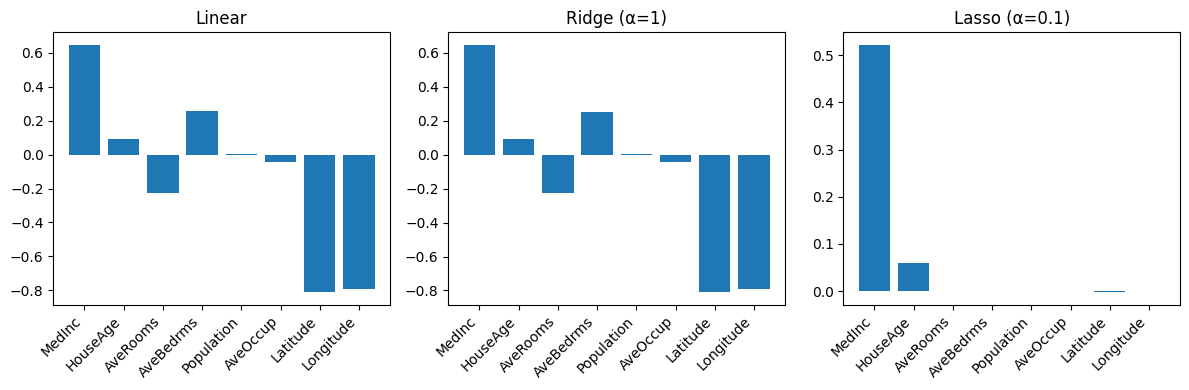

In [ ]:

# Plot coefficients of linear models
plt.figure(figsize=(12, 4))

for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'coef_'):
        plt.subplot(1, 3, i+1)
        plt.bar(range(len(model.coef_)), model.coef_)
        plt.title(name)
        plt.xticks(range(len(cali.feature_names)), cali.feature_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()